# Classification
## Gaussian Naive Bayes Classifier
### Load, and prepare dataset

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display
# Load the Iris dataset
iris = load_iris() 
# create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0=setosa, 1=versicolor, 2=virginica)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split data into test and train dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the GNB Classifier

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## Make Predictions

In [7]:
# Make predictions
y_pred = gnb.predict(X_test)

## Evaluate the Model

In [8]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", )
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# GROUP C: Predicting Breast Cancer Diagnosis
### Dataset: Breast Cancer Wisconsin Diagnostic Dataset
### Build a GNB model to classify breast cancer diagnoses as malignant or benign based on features like mean radius, texture, and smoothness.


### Loading and preparing the data

In [9]:
from IPython.display import display
import pandas as pd

data = pd.read_csv('./BreastCancer/wdbc.data')
data.columns = ['ID','Diagnosis','Radius1','Texture1','Perimeter1','Area1','Smoothness1','Compactness1','Concavity1'
                ,'Concave_points1','Symmetry1','Fractal_dimension1','Radius2','Texture2'
                ,'Perimeter2','Area2','Smoothness2','Compactness2','Concavity2'
                ,'Concave_points2','Symmetry2','Fractal_dimension2','Radius3','Texture2'
                ,'Perimeter3','Area3','Smoothness3','Compactness3','Concavity3'
                ,'Concave_points3','Symmetry3','Fractal_dimension3']
data.head()

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,...,Radius3,Texture2,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Train-test model

In [10]:
from sklearn.model_selection import train_test_split

# Defining the features and target 
x = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=True)

### Training the GNB Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### Making Prediction

In [12]:
y_pred = gnb.predict(x_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype='<U1')

### Evaluating the model

In [13]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: \n")
print(classification_report(y_test,y_pred))

Accuracy:  0.7105263157894737
Classification report: 

              precision    recall  f1-score   support

           B       0.71      1.00      0.83        80
           M       1.00      0.03      0.06        34

    accuracy                           0.71       114
   macro avg       0.85      0.51      0.44       114
weighted avg       0.80      0.71      0.60       114



# Clustering
- K-means
- MeanShift
- DBSCAN

## K-Means Clustering Algorithm

In [15]:
import pandas as pd
home_data = pd.read_csv('data/housing.csv',\
                        usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


## Plot scattered plot to visualize the data

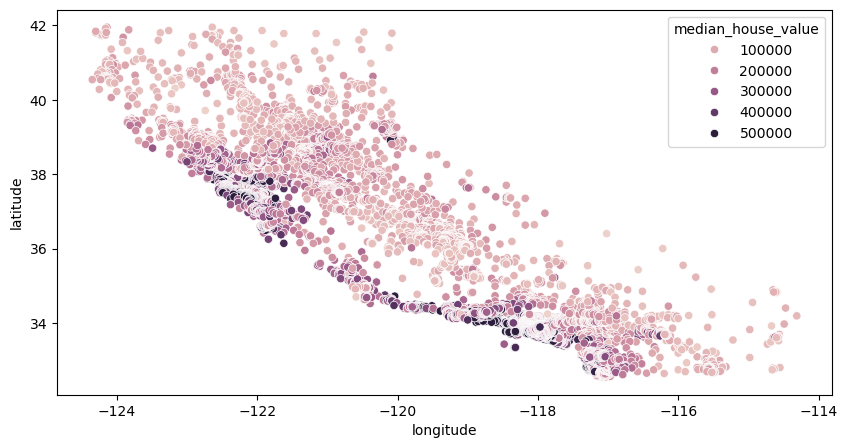

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

## Split Train/Test and Normalize Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)